<a href="https://colab.research.google.com/github/MAL3X-01/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/BitcoinStorytellingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Gold Data Cleanup

In [72]:
# https://www.perthmint.com/historical_metal_prices.aspx
goldold = pd.read_csv('goldmonthlyend.csv')

goldcurrent = pd.read_csv('goldmonthly-current.csv')
goldold.head()

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD

In [73]:
goldcurrent.head(500)

,Market,Perth Mint Spot,Perth Mint Spot.1,Perth Mint Spot.2,Perth Mint Spot.3,Perth Mint Spot.4,Perth Mint Spot.5,Perth Mint Spot.6,Perth Mint Spot.7,Perth Mint Spot.8,Perth Mint Spot.9,Perth Mint Spot.10,Perth Mint Spot.11,Perth Mint Spot.12,Perth Mint Spot.13,Perth Mint Spot.14,Perth Mint Spot.15,Perth Mint Spot.16,Perth Mint Spot.17,Perth Mint Spot.18,Perth Mint Spot.19,Perth Mint Spot.20,Perth Mint Spot.21,Perth Mint Spot.22,Perth Mint Spot.23,Perth Mint Spot.24,Perth Mint Spot.25,Perth Mint Spot.26,Perth Mint Spot.27,Perth Mint Spot.28,Perth Mint Spot.29,Perth Mint Spot.30,Perth Mint Spot.31,Perth Mint Spot.32,Perth Mint Spot.33,Perth Mint Spot.34,Perth Mint Spot.35,Perth Mint Spot.36,Perth Mint Spot.37,Perth Mint Spot.38,Perth Mint Spot.39,Perth Mint Spot.40,Perth Mint Spot.41,Perth Mint Spot.42,Perth Mint Spot.43,Perth Mint Spot.44,Perth Mint Spot.45,Perth Mint Spot.46,Perth Mint Spot.47,Perth Mint Spot.48,Perth Mint Spot.49,Perth Mint Spot.50,Perth Mint Spot.51,Perth Mint Spot.52,Perth Mint Spot.53,Perth Mint Spot.54,Perth Mint Spot.55,Perth Mint Spot.56,Perth Mint Spot.57,Perth Mint Spot.58,Perth Mint Spot.59,Perth Mint Spot.60,Perth Mint Spot.61,Perth Mint Spot.62,Perth Mint Spot.63,Perth Mint Spot.64,Perth Mint Spot.65,Perth Mint Spot.66,Perth Mint Spot.67,Perth Mint Spot.68,Perth Mint Spot.69,Perth Mint Spot.70,Perth Mint Spot.71,Perth Mint Spot.72,Perth Mint Spot.73,Perth Mint Spot.74,Perth Mint Spot.75,Perth Mint Spot.76,Perth Mint Spot.77,Perth Mint Spot.78,Perth Mint Spot.79,Perth Mint Spot.80,Perth Mint Spot.81,Perth Mint Spot.82,Perth Mint Spot.83,Perth Mint Spot.84,Perth Mint Spot.85,Perth Mint Spot.86,Perth Mint Spot.87,Perth Mint Spot.88,Perth Mint Spot.89,London Fix,London Fix.1,London Fix.2,London Fix.3,London Fix.4,London Fix.5,London Fix.6,HSRA,Interest Rates,Interest Rates.1,London Fix.7,London Fix.8,London Fix.9,London Fix.10,London Fix.11,London Fix.12,London Fix.13,HSRA.1,Interest Rates.2,Interest Rates.3,London Fix.14,London Fix.15,London Fix.16,London Fix.17,London Fix.18,London Fix.19,London Fix.20,HSRA.2,Interest Rates.4,Interest Rates.5,Stock,Stock.1,CPI,CPIAUCSL_PC1,FEDFUNDS,Real US Short Term Interest Rates
0,Metal/Currency,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,AUD,AUD,AUD,AUD,USD,USD,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Silver,Platinum,Palladium,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,Gold,Gold,Silver,Platinum,Platinum,Palladium,Palladium,AUD,Federal Funds Rate,On Call Unofficial,S&P/ASX 200,S&P/ASX 200,All Groups Australia,Consumer Price Index for All Urban Consumers: ...,Effective Federal Funds Rate,NaN
1,Priced In,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,JPY,JPY,JPY,JPY,AUD,AUD,AUD,AUD,AUD,AUD,AUD,AUD,JPY,JPY,JPY,JPY,JPY,JPY,JPY,JPY,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,USD,USD,USD,USD,USD,USD,USD,USD,USD,AUD,Accumulation Index,NaN,Index,USD,USD,NaN
2,Price Type,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask,Bid,Ask,Bid,Ask,Bid,Ask,Bid,Bid,Bid,Bid,Ask,Ask,Ask,Ask

In [4]:
newgoldold = goldold[['Market','Perth Mint Spot']][4:]

print(newgoldold.shape)
newgoldold.head()

(2025, 2)


,Market,Perth Mint Spot
4,Jan 68,NaN
5,Feb 68,NaN
6,Mar 68,NaN
7,Apr 68,NaN
8,May 68,NaN


In [5]:
newgoldold = newgoldold.dropna()

print(newgoldold.shape)
newgoldold.head()

(295, 2)


,Market,Perth Mint Spot
285,Jun 91,368.25
286,Jul 91,371.25
287,Aug 91,364.00
288,Sep 91,354.00
289,Oct 91,363.50


In [6]:
newgoldcurrent = goldcurrent[['Market','Perth Mint Spot']][4:]

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [7]:
newgoldcurrent = newgoldcurrent.dropna()

print(newgoldcurrent.shape)
newgoldcurrent.head()

(41, 2)


,Market,Perth Mint Spot
4,Jan 16,1121.35
5,Feb 16,1242.96
6,Mar 16,1277.2
7,Apr 16,1273.27
8,May 16,1296.61


In [8]:
goldmonthlyprice = pd.concat([newgoldold, newgoldcurrent])

goldmonthlyprice = goldmonthlyprice.reset_index()
goldmonthlyprice = goldmonthlyprice.drop(columns='index')

print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 2)


,Market,Perth Mint Spot
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [9]:
goldmonthlyprice.isnull().sum()

Market             0
Perth Mint Spot    0
dtype: int64

In [10]:
goldmonthlyprice = goldmonthlyprice.rename(columns={'Market':'Date', 'Perth Mint Spot':'Price'})

goldmonthlyprice.head()

,Date,Price
0,Jun 91,368.25
1,Jul 91,371.25
2,Aug 91,364.00
3,Sep 91,354.00
4,Oct 91,363.50


In [11]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
Date     336 non-null object
Price    336 non-null object
dtypes: object(2)
memory usage: 5.3+ KB


In [12]:
goldmonthlyprice['Date'] = goldmonthlyprice['Date'].apply(lambda x: x.split())

goldmonthlyprice.head()

,Date,Price
0,"[Jun, 91]",368.25
1,"[Jul, 91]",371.25
2,"[Aug, 91]",364.00
3,"[Sep, 91]",354.00
4,"[Oct, 91]",363.50


In [13]:
goldmonthlyprice['Month'] = goldmonthlyprice['Date'].apply(lambda x: x[0])
goldmonthlyprice['Year'] = goldmonthlyprice['Date'].apply(lambda x: int(x[1]))

goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: '19'+str(x) if x >90 else ('200'+str(x) if x<10 else '20'+str(x)))
goldmonthlyprice.head()

,Date,Price,Month,Year
0,"[Jun, 91]",368.25,Jun,1991
1,"[Jul, 91]",371.25,Jul,1991
2,"[Aug, 91]",364.00,Aug,1991
3,"[Sep, 91]",354.00,Sep,1991
4,"[Oct, 91]",363.50,Oct,1991


In [14]:
goldmonthlyprice['Date'] = goldmonthlyprice['Month'] + goldmonthlyprice['Year']

goldmonthlyprice.head()

,Date,Price,Month,Year
0,Jun1991,368.25,Jun,1991
1,Jul1991,371.25,Jul,1991
2,Aug1991,364.00,Aug,1991
3,Sep1991,354.00,Sep,1991
4,Oct1991,363.50,Oct,1991


In [15]:
goldmonthlyprice['Date'].head().values

array(['Jun1991', 'Jul1991', 'Aug1991', 'Sep1991', 'Oct1991'],
      dtype=object)

In [16]:
goldmonthlyprice['Date'] = pd.to_datetime(goldmonthlyprice['Date'], infer_datetime_format=True)

goldmonthlyprice.head()

,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [17]:
goldmonthlyprice['Price'].head().values

array([' 368.25 ', ' 371.25 ', ' 364.00 ', ' 354.00 ', ' 363.50 '],
      dtype=object)

In [0]:
goldmonthlyprice['Year'] = goldmonthlyprice['Year'].apply(lambda x: int(x))
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: x.split()[0])
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: x.replace(',', ''))

In [19]:
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: str(x))
goldmonthlyprice['Price'] = goldmonthlyprice['Price'].apply(lambda x: float(x))
goldmonthlyprice['Price'].head().values

array([368.25, 371.25, 364.  , 354.  , 363.5 ])

In [20]:
print(goldmonthlyprice.shape)
goldmonthlyprice.head()

(336, 4)


,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [21]:
goldmonthlyprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
Date     336 non-null datetime64[ns]
Price    336 non-null float64
Month    336 non-null object
Year     336 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 10.6+ KB


# Bitcoin Data Cleanup

In [0]:
# https://datahub.io/cryptocurrency/bitcoin
bitcoindata = pd.read_csv('bitcoin_csv.csv')

#https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20181123&end=20190623
btcdatacmc = pd.read_csv('btcpricecmc.csv')

## Data From CoinMarketCap

In [23]:
print(btcdatacmc.shape)
btcdatacmc.head()

(213, 7)


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jun 23, 2019","10,696.69","11,246.14","10,556.10","10,855.37","20,998,326,502","192,970,090,355"
1,"Jun 22, 2019","10,175.92","11,157.35","10,107.04","10,701.69","29,995,204,861","190,214,124,824"
2,"Jun 21, 2019","9,525.07","10,144.56","9,525.07","10,144.56","20,624,008,643","180,293,241,528"
3,"Jun 20, 2019","9,273.06","9,594.42","9,232.48","9,527.16","17,846,823,784","169,304,784,791"
4,"Jun 19, 2019","9,078.73","9,299.62","9,070.40","9,273.52","15,546,809,946","164,780,855,869"


In [24]:
btcpricecmc = btcdatacmc[['Date', 'High']]

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,High
0,"Jun 23, 2019","11,246.14"
1,"Jun 22, 2019","11,157.35"
2,"Jun 21, 2019","10,144.56"
3,"Jun 20, 2019","9,594.42"
4,"Jun 19, 2019","9,299.62"


In [25]:
btcpricecmc = btcpricecmc.rename(columns={'High':'Price'})

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
0,"Jun 23, 2019","11,246.14"
1,"Jun 22, 2019","11,157.35"
2,"Jun 21, 2019","10,144.56"
3,"Jun 20, 2019","9,594.42"
4,"Jun 19, 2019","9,299.62"


In [26]:
btcpricecmc['Date'] = pd.to_datetime(btcpricecmc['Date'], infer_datetime_format=True)

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
0,2019-06-23,"11,246.14"
1,2019-06-22,"11,157.35"
2,2019-06-21,"10,144.56"
3,2019-06-20,"9,594.42"
4,2019-06-19,"9,299.62"


In [27]:
btcpricecmc = btcpricecmc.iloc[::-1]

print(btcpricecmc.shape)
btcpricecmc.head()

(213, 2)


,Date,Price
212,2018-11-23,"4,396.42"
211,2018-11-24,"4,413.09"
210,2018-11-25,"4,120.87"
209,2018-11-26,"4,107.14"
208,2018-11-27,"3,862.96"


## Data From DataHub.io

In [28]:
print(bitcoindata.shape)
bitcoindata.head()

(3605, 16)


,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [29]:
btcprice = bitcoindata[['date', 'price(USD)']]

print(btcprice.shape)
btcprice.head()

(3605, 2)


,date,price(USD)
0,2009-01-09,NaN
1,2009-01-10,NaN
2,2009-01-11,NaN
3,2009-01-12,NaN
4,2009-01-13,NaN


In [30]:
btcprice = btcprice.dropna()

print(btcprice.shape)
btcprice.head()

(2035, 2)


,date,price(USD)
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00
1574,2013-05-02,116.38


In [31]:
btcprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 1570 to 3604
Data columns (total 2 columns):
date          2035 non-null object
price(USD)    2035 non-null float64
dtypes: float64(1), object(1)
memory usage: 47.7+ KB


In [32]:
btcprice['date'] = pd.to_datetime(btcprice['date'], infer_datetime_format=True)

# Begin:2013-04-28	135.30           END:2018-11-22	4611.57
print(btcprice.shape)
btcprice.head()

(2035, 2)


,date,price(USD)
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00
1574,2013-05-02,116.38


In [33]:
btcprice = btcprice.rename(columns={'date':'Date', 'price(USD)':'Price'})

print(btcprice.shape)
btcprice.head()

(2035, 2)


,Date,Price
1570,2013-04-28,135.30
1571,2013-04-29,134.44
1572,2013-04-30,144.00
1573,2013-05-01,139.00
1574,2013-05-02,116.38


## Concat Data

In [34]:
fbtcprice = pd.concat([btcprice, btcpricecmc])

print(fbtcprice.shape)
fbtcprice.head()

(2248, 2)


,Date,Price
1570,2013-04-28,135.3
1571,2013-04-29,134.44
1572,2013-04-30,144
1573,2013-05-01,139
1574,2013-05-02,116.38


In [35]:
fbtcprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 1570 to 0
Data columns (total 2 columns):
Date     2248 non-null datetime64[ns]
Price    2248 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 52.7+ KB


In [36]:
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: str(x))
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: x.replace(',', ''))
fbtcprice['Price'] = fbtcprice['Price'].apply(lambda x: float(x))
fbtcprice = fbtcprice.reset_index(drop=True)

print(fbtcprice.shape)
fbtcprice.head()

(2248, 2)


,Date,Price
0,2013-04-28,135.30
1,2013-04-29,134.44
2,2013-04-30,144.00
3,2013-05-01,139.00
4,2013-05-02,116.38


In [37]:
fbtcprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 2 columns):
Date     2248 non-null datetime64[ns]
Price    2248 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.2 KB


# Top Stocks Data Cleanup

# Data Exploration

## Gold

In [38]:
goldmonthlyprice.head()

,Date,Price,Month,Year
0,1991-06-01,368.25,Jun,1991
1,1991-07-01,371.25,Jul,1991
2,1991-08-01,364.00,Aug,1991
3,1991-09-01,354.00,Sep,1991
4,1991-10-01,363.50,Oct,1991


In [39]:
goldmonthlyprice.describe()

,Price,Year
count,336.000000,336.000000
mean,765.517500,2004.916667
std,482.200799,8.104848
min,261.300000,1991.000000
25%,357.200000,1998.000000
50%,446.800000,2005.000000
75%,1255.870000,2012.000000
max,1915.550000,2019.000000


## Bitcoin


In [40]:
fbtcprice.head()

,Date,Price
0,2013-04-28,135.30
1,2013-04-29,134.44
2,2013-04-30,144.00
3,2013-05-01,139.00
4,2013-05-02,116.38


In [41]:
fbtcprice.describe()

,Price
count,2248.000000
mean,2549.195529
std,3430.610146
min,68.500000
25%,353.065000
50%,639.245000
75%,4078.335000
max,19475.800000


# All

In [42]:
fbtcprice['Type'] = 'BTC'

fbtcprice.head()

,Date,Price,Type
0,2013-04-28,135.30,BTC
1,2013-04-29,134.44,BTC
2,2013-04-30,144.00,BTC
3,2013-05-01,139.00,BTC
4,2013-05-02,116.38,BTC


In [49]:
goldmonthlyprice['Type'] = 'Gold'
goldmonthlyprice1 = goldmonthlyprice.drop(columns=['Month', 'Year'])

goldmonthlyprice1.head()

,Date,Price,Type
0,1991-06-01,368.25,Gold
1,1991-07-01,371.25,Gold
2,1991-08-01,364.00,Gold
3,1991-09-01,354.00,Gold
4,1991-10-01,363.50,Gold


In [50]:
df = pd.concat([goldmonthlyprice1, fbtcprice])

df.head()

,Date,Price,Type
0,1991-06-01,368.25,Gold
1,1991-07-01,371.25,Gold
2,1991-08-01,364.00,Gold
3,1991-09-01,354.00,Gold
4,1991-10-01,363.50,Gold


In [63]:
df[df['Type'] == 'BTC']

,Date,Price,Type
0,2013-04-28,135.30,BTC
1,2013-04-29,134.44,BTC
2,2013-04-30,144.00,BTC
3,2013-05-01,139.00,BTC
4,2013-05-02,116.38,BTC
5,2013-05-03,106.25,BTC
6,2013-05-04,98.10,BTC
7,2013-05-05,112.90,BTC
8,2013-05-06,115.98,BTC
9,2013-05-07,112.25,BTC


In [68]:
df1 = df[df['Date'] >= '2013-05-01']

df1.head()

,Date,Price,Type
263,2013-05-01,1474.56,Gold
264,2013-06-01,1412.69,Gold
265,2013-07-01,1340.81,Gold
266,2013-08-01,1423.50,Gold
267,2013-09-01,1408.95,Gold


# Visualization

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

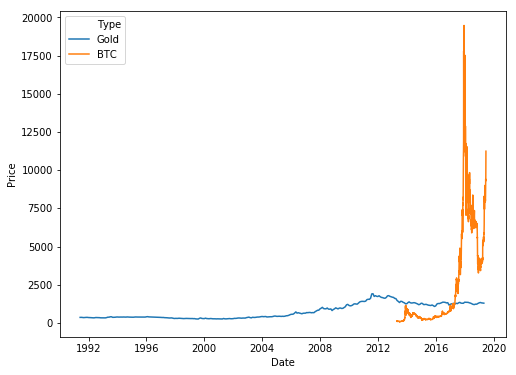

In [69]:
plt.figure(figsize=(8, 6), facecolor='w')


sns.lineplot(x = 'Date', y='Price', data=df, hue='Type');

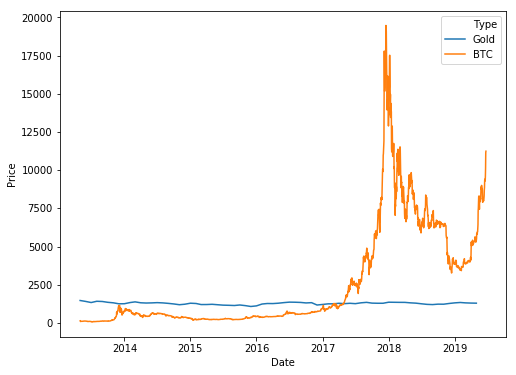

In [70]:
plt.figure(figsize=(8, 6), facecolor='w')

sns.lineplot(x = 'Date', y='Price', data=df1, hue='Type');

# Experimental Visualization

In [0]:
import matplotlib.animation as animation

In [0]:

fig, ax = plt.subplots(figsize=(12, 8), facecolor='w')

x = fbtcprice['Date']
y = fbtcprice['Price']

#line, = ax.plot(x, y, color='k')

line, = ax.plot(x, y, lw=2, color='k')

def init():
    line.set_data([], [])
    return line,


def animate(i):
    line.set_data(x[:i], y[:i])
    return line,


ani = animation.FuncAnimation(fig, animate, init_func=init, frames =100, interval=25, blit=True)
#ani = animation.FuncAnimation(fig, animate, frames=17, repeat=True)


plt.show();

In [0]:
#from matplotlib.animation import FFMpegWriter
#writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
#ani.save("movie.mp4", writer=writer)